<a href="https://colab.research.google.com/github/nitishkumar34/mobile-price/blob/main/capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile price Range prediction

**Objective**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

**Data Description**-

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

**Importing all libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import numpy as np


In [ ]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading dataset

In [36]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone project 3/Copy of data_mobile_price_range.csv")
df.shape

(2000, 21)

**Data Inspection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Checking Null values**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no null value present in given dataset

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [33]:
df.shape

(4, 4)

In [ ]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Correlation Heatmap**

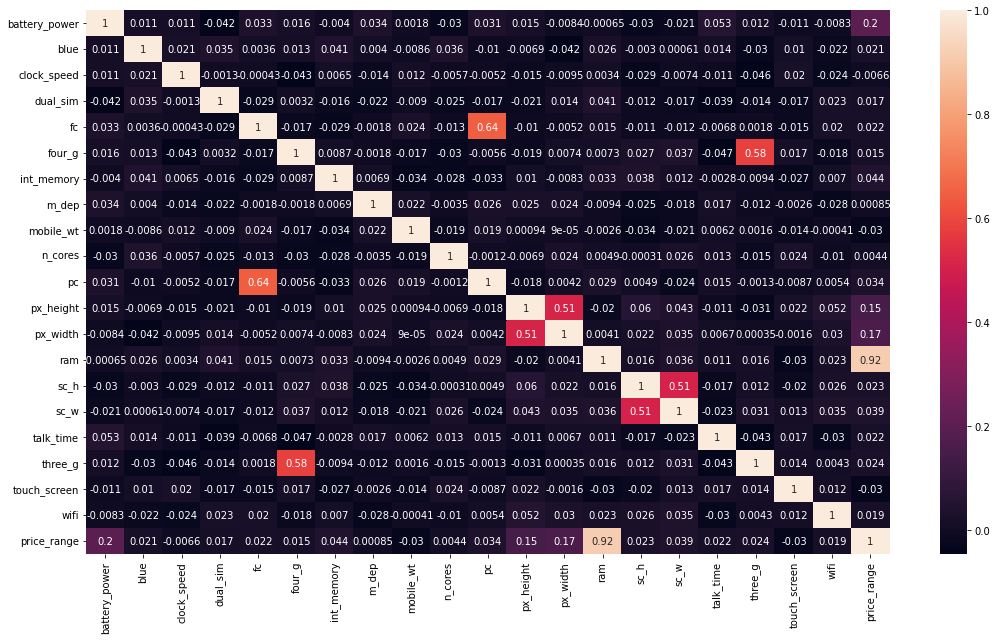

In [37]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There are no two column which are strongly related to each other but we will do some feature engineering to reduce the number of columns

#Feature Engineering

We will calculate screen area(size) to get one column from screen height and screen width.

Using pythagorous theorem to get diagonal size which will be equal to screen size.

In [38]:
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

**Seperating categoricals and continuous variable**

In [39]:
categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi','n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time','screen_size']

#EDA

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


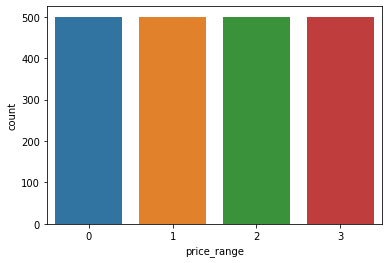

In [40]:
# CountPlot of Target variable(Price range )

sns.countplot(df['price_range'])

**Price range and number of mobile phones**

([<matplotlib.patches.Wedge at 0x7fc164cdf8d0>,
 [Text(0.7778174593052024, 0.7778174593052023, 'low'),
  Text(-0.7778174593052023, 0.7778174593052024, 'medium '),
  Text(-0.7778174593052025, -0.7778174593052023, 'high '),
  Text(0.7778174593052022, -0.7778174593052025, 'very high ')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.00%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.00%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00%')])

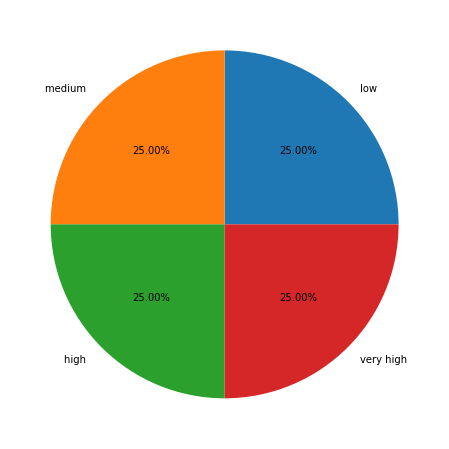

In [42]:
# Pie Plot of Target variable(Price range ) showing percentage of each catogory
count=df['price_range'].value_counts().values
classes = ['low','medium ', 'high ', 'very high ']
plt.figure(figsize=(8,8))
plt.pie(count,labels=classes, autopct='%1.2f%%')


Each price range have equal mobiles

**Counting mobiles based on feature**

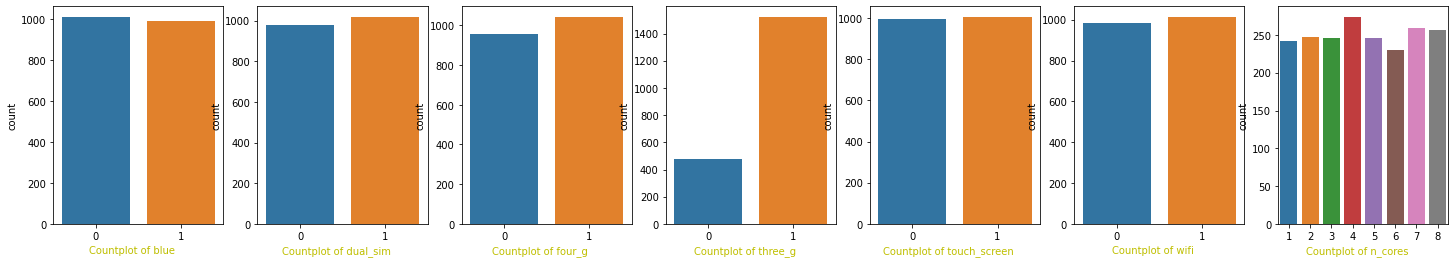

In [34]:
# Plot showing countplot  for  each categorical variable 
fig, axs = plt.subplots(1, len(categoricals), figsize=(25,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])
    axs[i].set_xlabel(f'Countplot of {categoricals[i]}    ',color='y')

**Analysing that the number of phones with all features based on price range(0.1,2,3)**

7


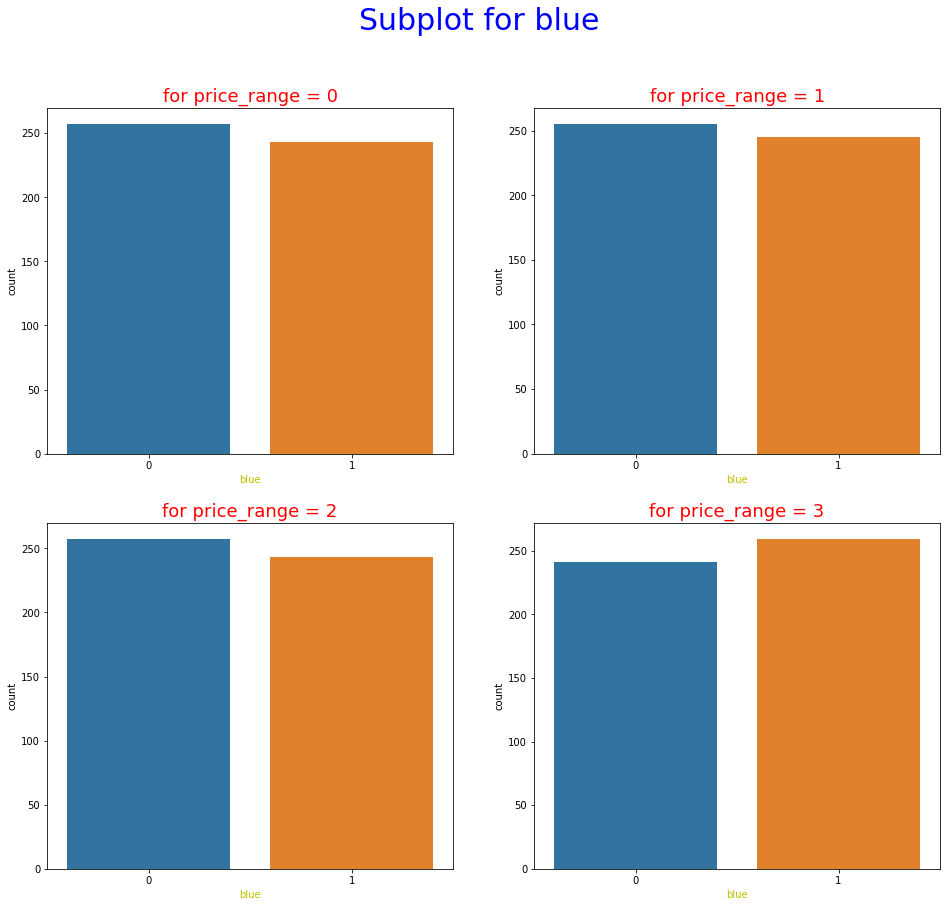

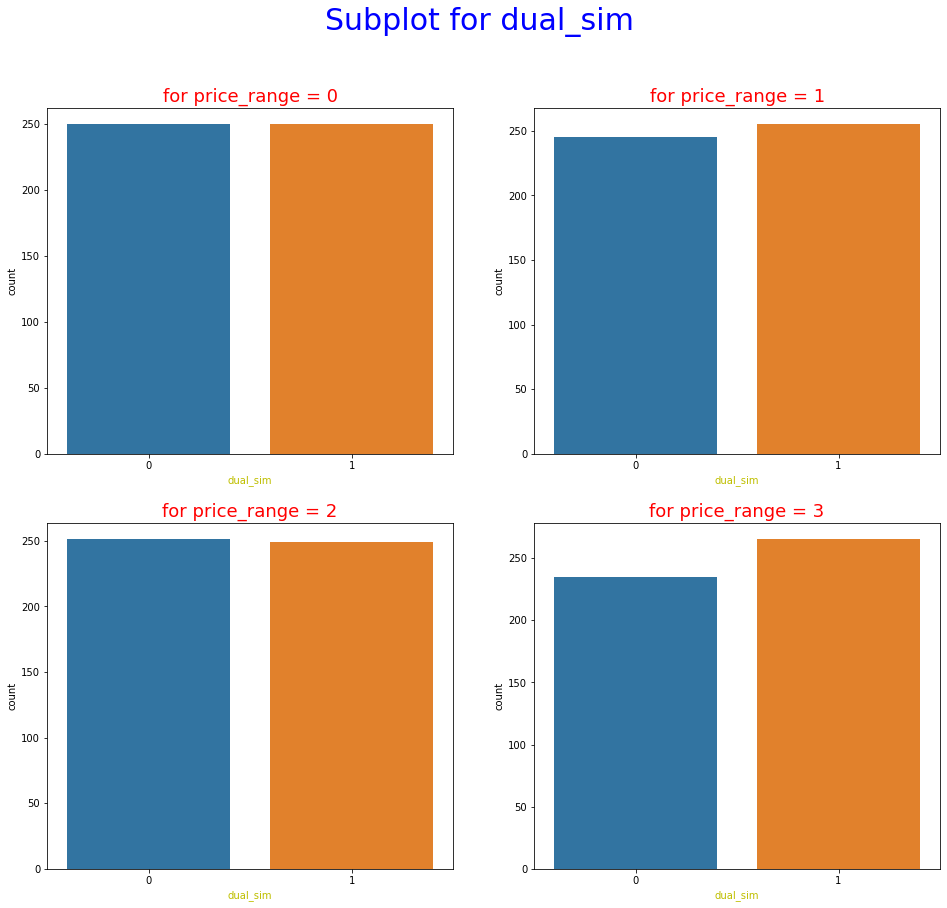

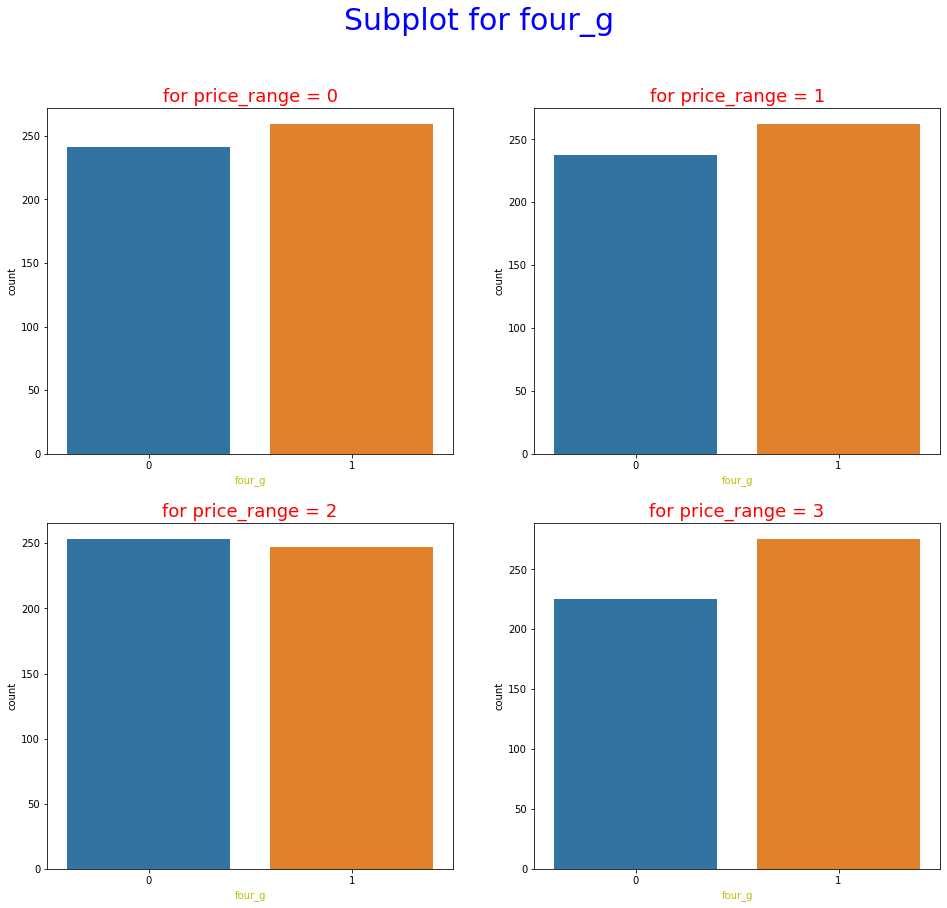

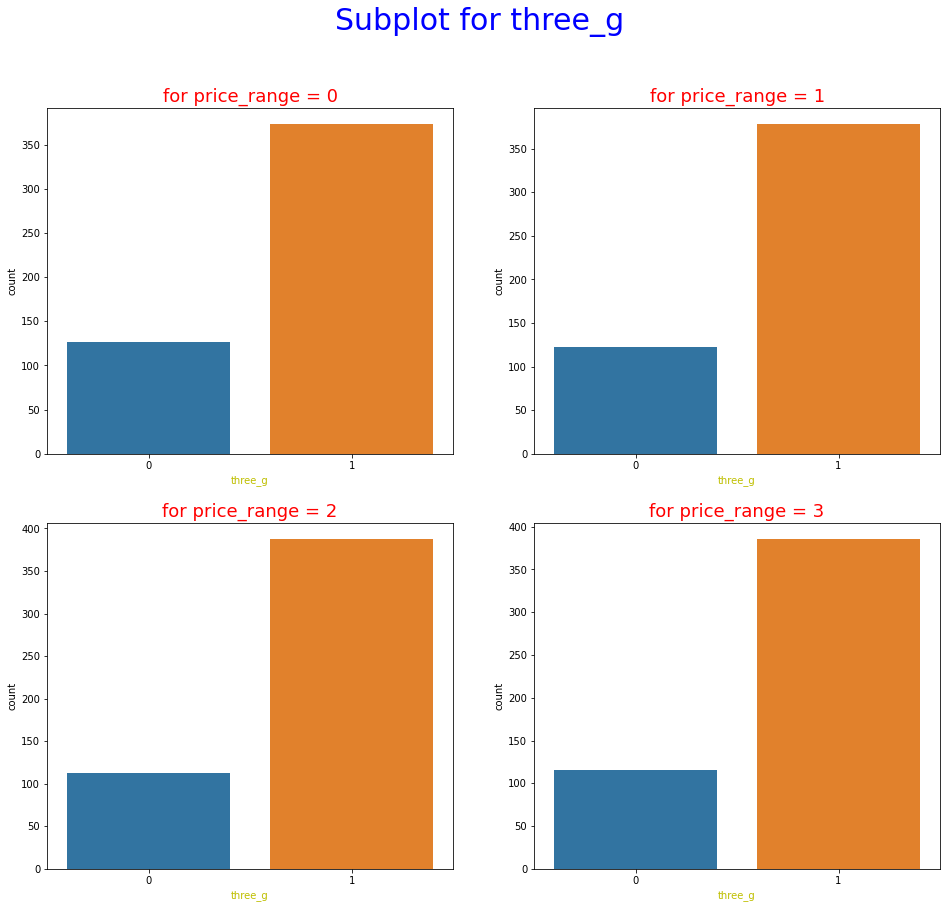

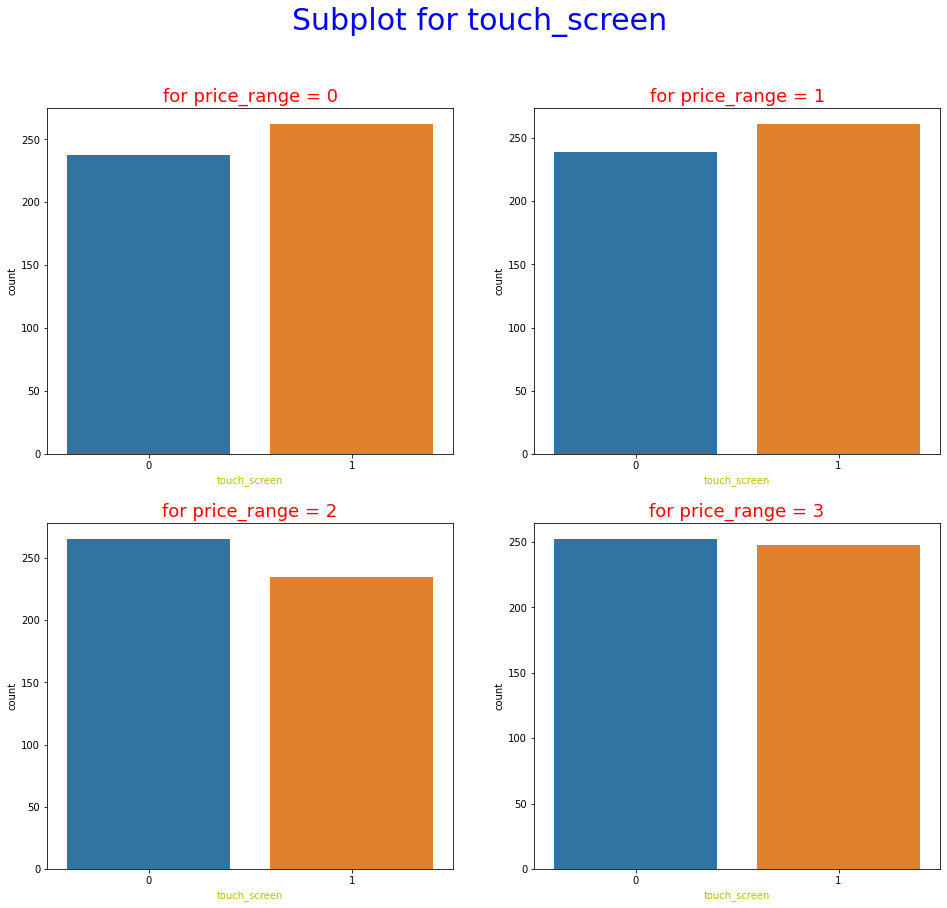

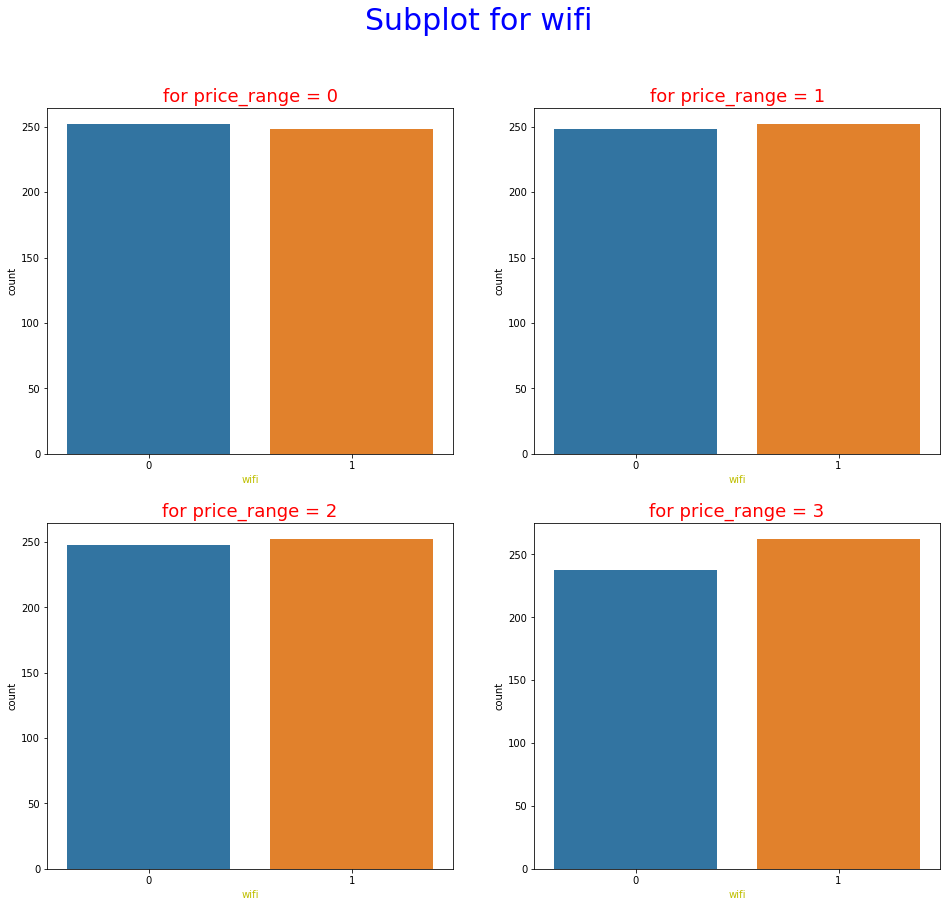

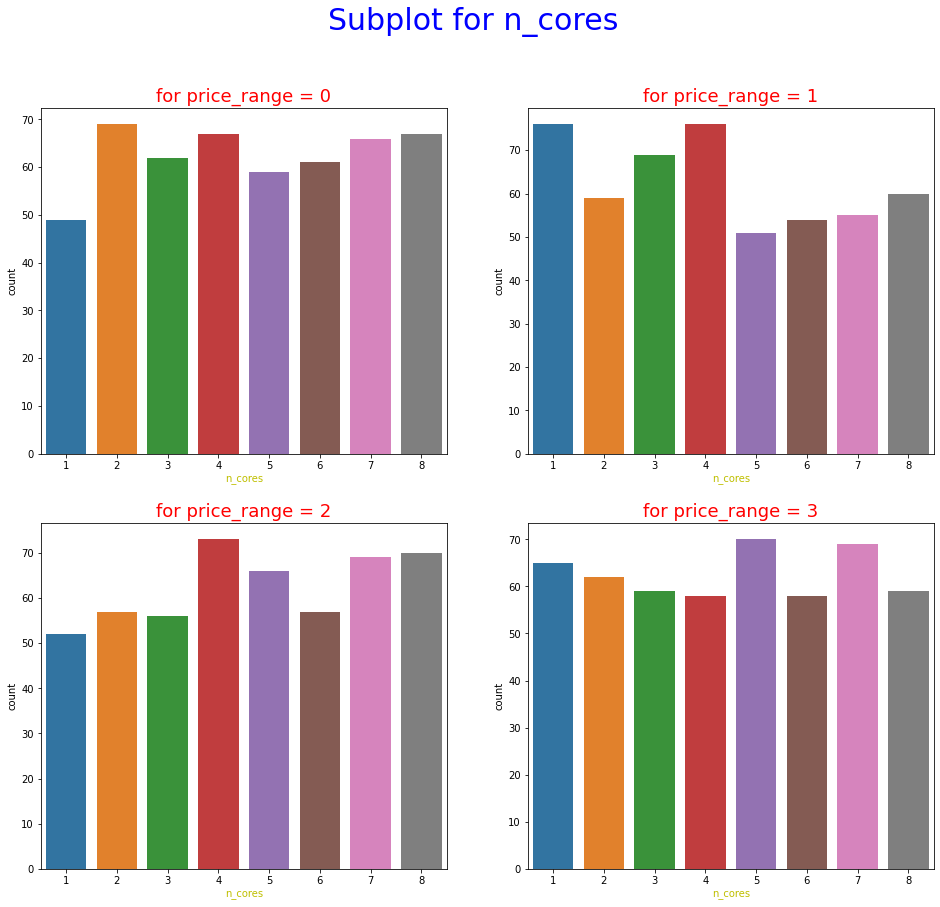

In [20]:
# Countplot of three g sim for each price range
#fig, axs = plt.subplots(2,2, figsize=(16, 14))
length = len(categoricals)
print(length)
for j in range(length):
  
  fig, axs = plt.subplots(2,2, figsize=(16, 14))
  plt.suptitle(f'Subplot for {categoricals[j]}', size=30,color='b')
  for i in range(4):
        sns.countplot(x=df[df['price_range']==i][categoricals[j]] , ax=axs[i//2][i%2])
        axs[i//2][i%2].set_xlabel(categoricals[j],color='y')
        axs[i//2][i%2].set_title(f'for price_range = {i}',color='r',size=18)

**Analysis based on price range for different feature**

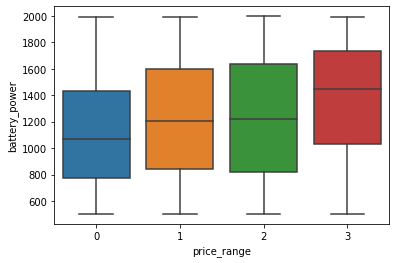

In [43]:
# Boxplot for battery power for each price catogory
sns.boxplot(data=df, x='price_range', y='battery_power', )


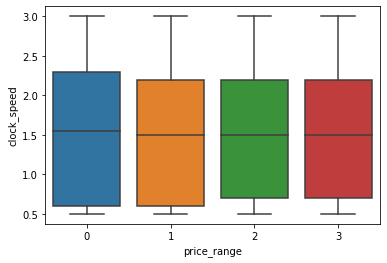

In [ ]:
# Boxplot for 'Clock Speed' for each price catogory
sns.boxplot(data=df, x='price_range', y='clock_speed')

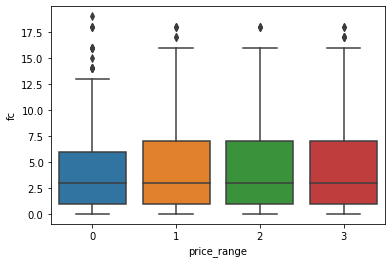

In [44]:
# Boxplot for Front Camera for each price catogory
sns.boxplot(data=df, x='price_range', y='fc')

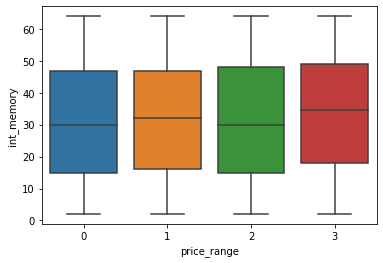

In [46]:
# Boxplot for 'Internal memory' for each price catogory
#plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='price_range', y='int_memory')

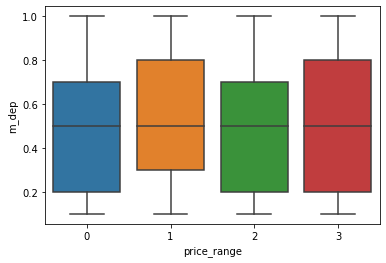

In [47]:
# Boxplot for Mobile Depth for each price catogory
sns.boxplot(data=df, x='price_range', y='m_dep')

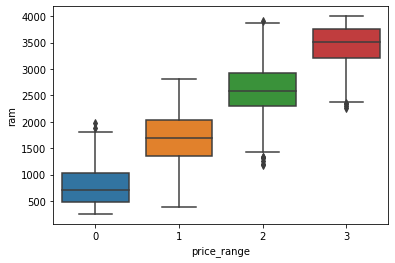

In [ ]:
# Boxplot for RAM for each price catogory
sns.boxplot(data=df, x='price_range', y='ram')

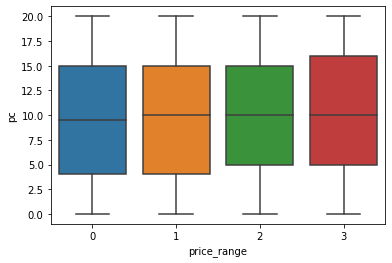

In [ ]:
# Boxplot for Primary Camera for each price catogory
sns.boxplot(data=df, x='price_range', y='pc')

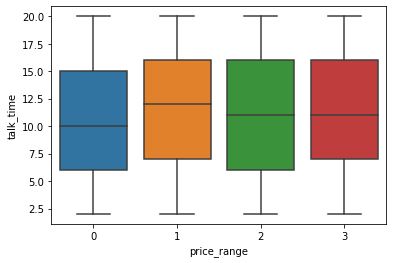

In [ ]:
# Boxplot for Talk Time for each price catogory
sns.boxplot(data=df, x='price_range', y='talk_time')

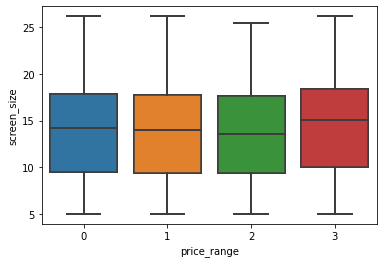

In [ ]:
# Boxplot for Screen Size for each price catogory
for i in continuous:
  sns.boxplot(data=df, x='price_range', y='screen_size')

#Splitting dependent and Independent variable into test and train dataset

In [6]:
# Input and output variables
y=df['price_range']
x=df.drop('price_range',axis=1)


In [7]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

#Implementing Logistic regression ML algorithm for classification

In [9]:
#Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
# Using multiclass logistic regression
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',fit_intercept=True, )
model.fit(x_train, y_train)
train_preds_proba = model.predict_proba(x_train)
test_preds_proba = model.predict_proba(x_test)
# Get the predicted classes
train_class_pred = model.predict(x_train)
test_class_pred = model.predict(x_test)


**Evaluating the performance of the trained model**

In [11]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
train_accuracy



0.9788235294117648

In [12]:
test_accuracy = accuracy_score(test_class_pred,y_test)
test_accuracy

0.9566666666666667

Model coefficient

[[-2.74321758e+00  2.17942265e-02  9.84093902e-02  1.31909295e-01
  -8.16429604e-02 -6.66213175e-02 -2.04161931e-01  5.29282971e-02
   3.81515246e-01 -3.27939430e-02 -2.77574412e-02 -1.59526660e+00
  -1.63161470e+00 -1.10615862e+01 -9.70180778e-03 -1.00026581e-02
   8.71605109e-02  1.49846866e-01  5.03371557e-02]
 [-8.67963481e-01  1.36963128e-02 -4.85875812e-02  8.04688444e-03
   3.26408304e-02  1.51553899e-02 -6.57266031e-02  9.42896333e-02
   1.92685342e-01 -1.12644264e-01 -8.92303266e-02 -4.59176543e-01
  -5.84819219e-01 -3.52227892e+00  2.41144703e-03 -1.04443856e-02
   4.38699047e-02 -2.54440379e-03 -6.91979774e-02]
 [ 8.39024908e-01 -1.38038761e-02 -5.17802845e-02 -1.16144840e-01
   5.57112373e-02 -1.29100479e-02 -1.35447605e-02 -5.47989104e-02
  -7.97114345e-03  4.34322086e-02  2.31551611e-02  4.76796759e-01
   5.02718664e-01  3.48235260e+00 -3.20915219e-02  4.82707438e-03
  -1.00151773e-01 -4.27212296e-02 -9.77024233e-02]
 [ 2.77215616e+00 -2.16866632e-02  1.95847554e-03 -2.38

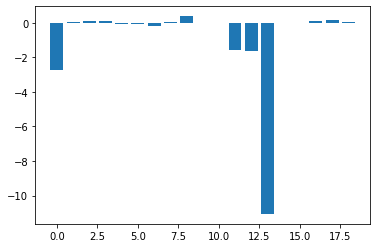

Feature: 0, Score: -0.86796
Feature: 1, Score: 0.01370
Feature: 2, Score: -0.04859
Feature: 3, Score: 0.00805
Feature: 4, Score: 0.03264
Feature: 5, Score: 0.01516
Feature: 6, Score: -0.06573
Feature: 7, Score: 0.09429
Feature: 8, Score: 0.19269
Feature: 9, Score: -0.11264
Feature: 10, Score: -0.08923
Feature: 11, Score: -0.45918
Feature: 12, Score: -0.58482
Feature: 13, Score: -3.52228
Feature: 14, Score: 0.00241
Feature: 15, Score: -0.01044
Feature: 16, Score: 0.04387
Feature: 17, Score: -0.00254
Feature: 18, Score: -0.06920


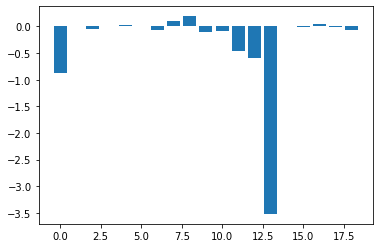

Feature: 0, Score: 0.83902
Feature: 1, Score: -0.01380
Feature: 2, Score: -0.05178
Feature: 3, Score: -0.11614
Feature: 4, Score: 0.05571
Feature: 5, Score: -0.01291
Feature: 6, Score: -0.01354
Feature: 7, Score: -0.05480
Feature: 8, Score: -0.00797
Feature: 9, Score: 0.04343
Feature: 10, Score: 0.02316
Feature: 11, Score: 0.47680
Feature: 12, Score: 0.50272
Feature: 13, Score: 3.48235
Feature: 14, Score: -0.03209
Feature: 15, Score: 0.00483
Feature: 16, Score: -0.10015
Feature: 17, Score: -0.04272
Feature: 18, Score: -0.09770


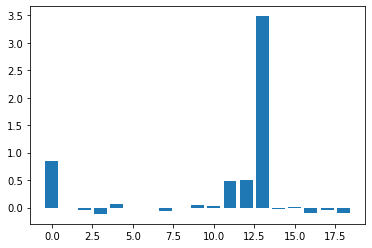

Feature: 0, Score: 2.77216
Feature: 1, Score: -0.02169
Feature: 2, Score: 0.00196
Feature: 3, Score: -0.02381
Feature: 4, Score: -0.00671
Feature: 5, Score: 0.06438
Feature: 6, Score: 0.28343
Feature: 7, Score: -0.09242
Feature: 8, Score: -0.56623
Feature: 9, Score: 0.10201
Feature: 10, Score: 0.09383
Feature: 11, Score: 1.57765
Feature: 12, Score: 1.71372
Feature: 13, Score: 11.10151
Feature: 14, Score: 0.03938
Feature: 15, Score: 0.01562
Feature: 16, Score: -0.03088
Feature: 17, Score: -0.10458
Feature: 18, Score: 0.11656


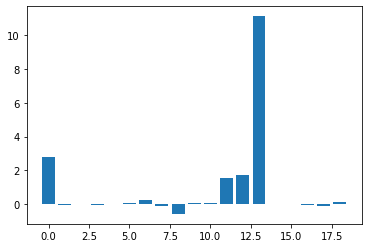

In [13]:
print(model.coef_)
for i in range(0,4):
 importance = model.coef_[i]
 # summarize feature importance
 for i,v in enumerate(importance):
	 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
 plt.bar([x for x in range(len(importance))], importance)
 plt.show()

ROC curve

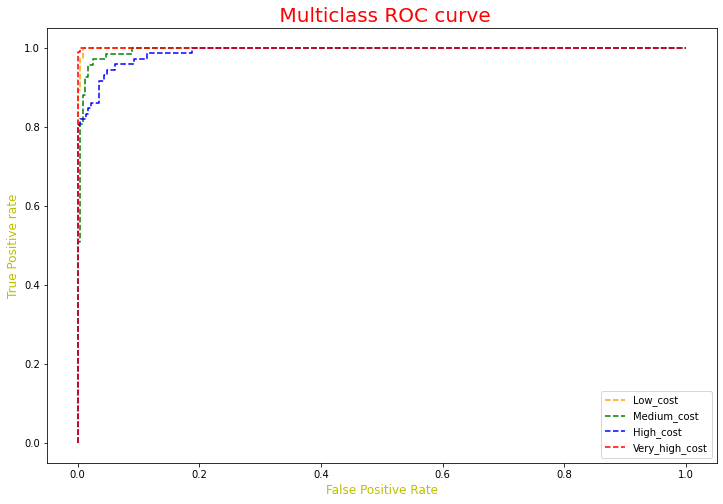

In [45]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.figure(figsize=(12,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve',color='r',size=20)
plt.xlabel('False Positive Rate',color='y',size=12)
plt.ylabel('True Positive rate',color='y',size=12)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

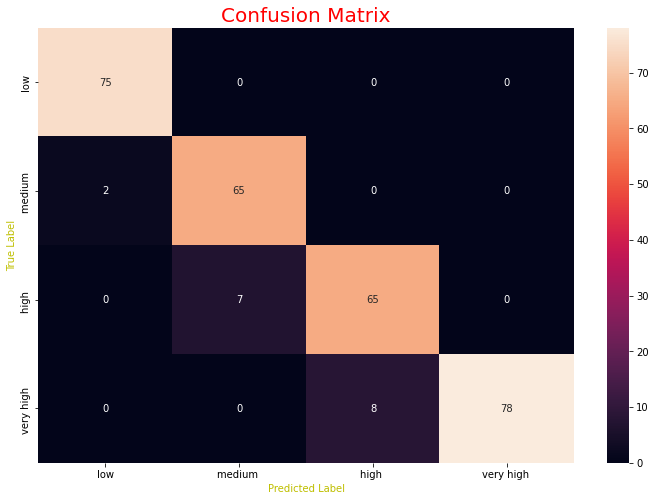

In [46]:

# Confusion Matrix
matrix=confusion_matrix(y_test,test_class_pred)
classes = ['low','medium ', 'high ', 'very high ']
df=pd.DataFrame(data=matrix,index=classes, columns=classes)
plt.figure(figsize=(12,8))
sns.heatmap(df,annot=True)
plt.xlabel("Predicted Label",color='y')

plt.ylabel("True Label",color='y')
plt.title("Confusion Matrix", color='r',size = 20)




In [24]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


#Implementing Random Forest Classifier model

In [14]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[300,500,800],
          'max_depth':[10,20,30,40],
          'min_samples_split':[2,4,6,8],
          'max_leaf_nodes':[None, 20, 40]
          }

In [15]:
#Using the random forest classifier for the prediction
rf = RandomForestClassifier()
# Using Grid Search
rf = GridSearchCV(rf, params, scoring='accuracy', cv=5)
rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 800]},
             scoring='accuracy')

Best Estimator

In [16]:
rf.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=800)

**Accuracy**

In [17]:
rf.best_score_


0.8876470588235292

In [18]:
y_pred=rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.88

**Confusion Matrix**

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


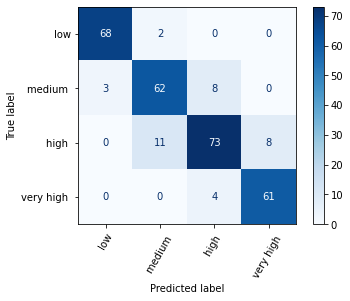

<Figure size 576x432 with 0 Axes>

In [28]:
classes = ['low','medium ', 'high ', 'very high ']
plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues, display_labels=classes, xticks_rotation='60')
plt.figure(figsize=(8,6))
plt.show()

#Implementing Decision tree classification ML Algorithm

In [20]:
# Import Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
pred

array([1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1,
       0, 0, 0, 2, 2, 0, 2, 0, 3, 1, 0, 2, 2, 3, 1, 2, 1, 2, 1, 3, 3, 0,
       2, 1, 0, 2, 2, 3, 1, 1, 2, 2, 2, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 3, 0, 3, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 1,
       2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 1, 1, 2, 3, 1, 0, 2, 3, 2, 3, 1, 0,
       3, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 3, 3, 1, 2, 1, 0,
       2, 3, 2, 3, 2, 2, 3, 0, 3, 3, 2, 0, 1, 3, 0, 0, 1, 2, 2, 0, 3, 0,
       0, 3, 1, 1, 2, 2, 0, 0, 1, 3, 3, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 0, 2, 2, 3, 3, 2, 1, 2, 3, 1,
       3, 3, 1, 3, 1, 2, 3, 2, 0, 1, 1, 1, 2, 2, 0, 3, 2, 0, 3, 1, 0, 1,
       0, 2, 1, 3, 0, 1, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 1, 3, 2, 3, 2, 0,
       3, 0, 3, 1, 1, 3, 3, 3, 3, 1, 0, 1, 0, 3, 2, 3, 1, 2, 0, 0, 0, 1,
       0, 3, 0, 2, 1, 3, 2, 2, 0, 1, 3, 2, 1, 1, 2, 2, 2, 1, 2, 3, 0, 2,
       0, 0, 2, 3, 3, 2, 0, 1, 0, 1, 2, 3, 1, 2])

**Accuracy**

In [21]:
accuracydt=accuracy_score(y_test,pred)
print(accuracydt)


0.83


**Confusion Matrix**

Text(0.5, r, 'Confusion Matrix')

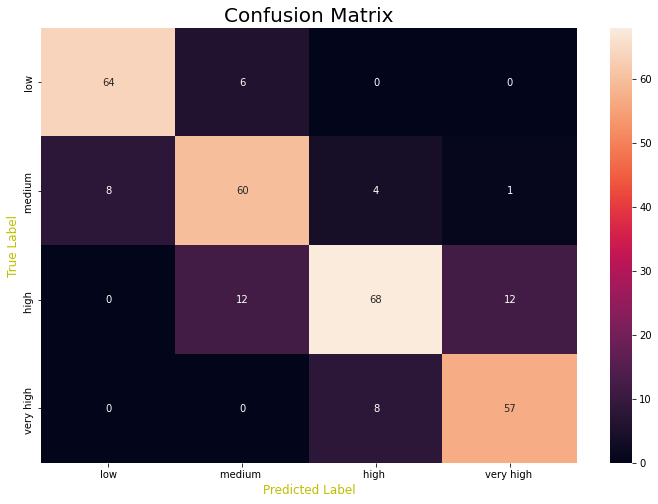

In [22]:
# Confusion Matrix
matrix=confusion_matrix(y_test,pred)
classes = ['low','medium ', 'high ', 'very high ']
df=pd.DataFrame(data=matrix,index=classes, columns=classes)
plt.figure(figsize=(12,8))
sns.heatmap(df,annot=True)
plt.xlabel("Predicted Label",size = 12,color='y')

plt.ylabel("True Label",size = 12,color='y')
plt.title("Confusion Matrix", size = 20,y='r')

**Interpretation or Justification of features**

In [25]:
from numpy.lib import shape_base
import shap
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(dt)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 
shap_values

[array([ 2.09408791e-02,  0.00000000e+00, -6.74418797e-04,  1.12464986e-03,
         7.87201686e-04,  0.00000000e+00,  4.01178977e-04,  1.41848739e-03,
         0.00000000e+00,  6.40413012e-04, -5.17682645e-04, -1.30889039e-02,
        -3.08418947e-03, -2.61289230e-01,  0.00000000e+00,  0.00000000e+00,
         2.04360056e-04,  0.00000000e+00,  1.96078431e-04]),
 array([ 3.68528259e-02,  0.00000000e+00,  3.97808153e-04, -1.12464986e-03,
        -1.34899404e-03,  0.00000000e+00, -4.01178977e-04, -2.52232845e-03,
         1.81137487e-03, -6.40413012e-04, -3.25244526e-04,  1.91468962e-02,
         5.55026080e-02,  6.30292962e-01,  2.42621234e-03,  0.00000000e+00,
        -2.04360056e-04, -1.03291317e-04,  9.06330216e-03]),
 array([-4.21483726e-02, -1.30718954e-04,  1.58963585e-04,  0.00000000e+00,
         5.61792352e-04,  3.52941176e-04,  0.00000000e+00,  3.55171143e-03,
        -7.16404643e-03, -3.47610569e-03, -1.50985498e-04, -7.72945369e-03,
        -3.11452446e-02, -1.40499218e-01, 

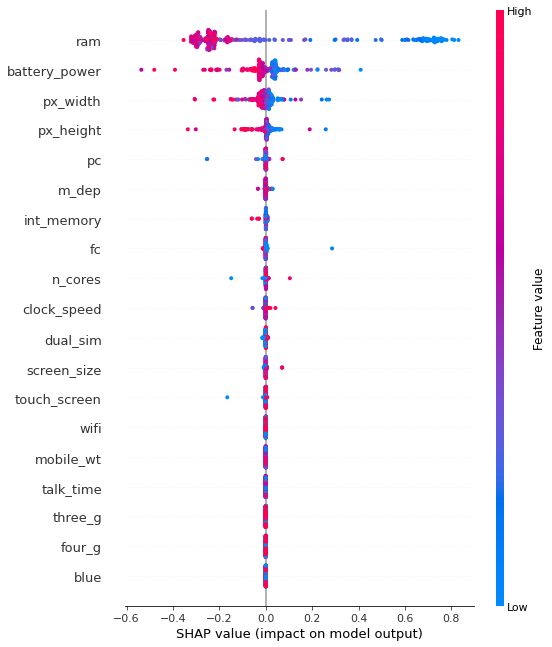

In [26]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(dt).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)


**Importance of features**

In [27]:
feature_importance = pd.DataFrame({'column':x.columns,
                                   'importance':dt.feature_importances_}).sort_values(by='importance', ascending=False)
feature_importance=feature_importance.reset_index(drop=True)
feature_importance

,column,importance
0,ram,0.606879
1,battery_power,0.141848
2,px_height,0.081528
3,px_width,0.080610
4,screen_size,0.017592
5,mobile_wt,0.015719
6,pc,0.010516
7,n_cores,0.009780
8,m_dep,0.009137
9,fc,0.005974


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

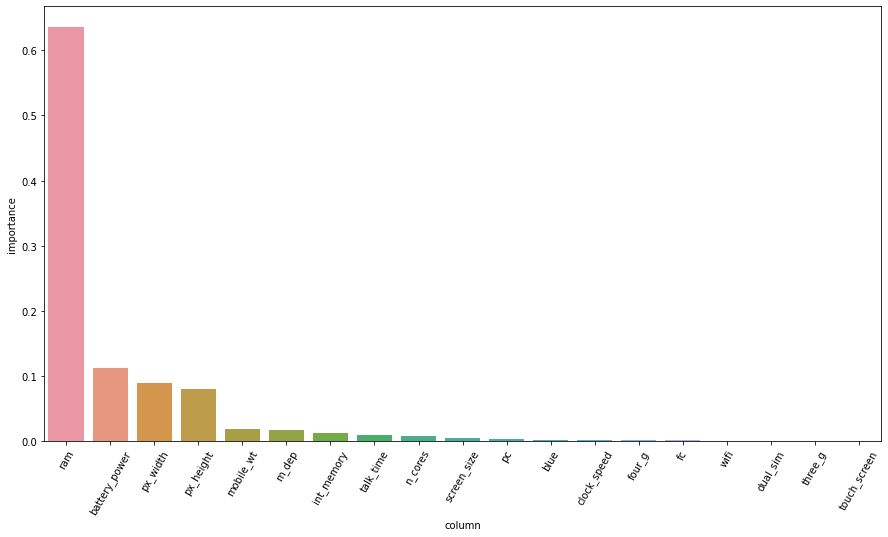

In [ ]:
# Plot the feature importance of model
plt.figure(figsize=(15,8))
sns.barplot(x=feature_importance['column'],y=feature_importance['importance'])
plt.xticks(rotation=60)

# Conclusion
1.Ram , Battery_power features were found to be the most relevant features for predicting price range of mobiles

2.LogisticRegression and Random Forest are given best accuracy score 97% train ,95% train and 88% train , 88% test respectively

3.Decision Tree is giving the less results among all the algorithms

4.So we conclude that kneighbors classifier is giving the best results for these dataset